<a href="https://colab.research.google.com/github/cmgpcinthia/Big_Data_Machine_Learning/blob/main/6_Clase6N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLUSTERING con PCA  Principal component analysis
 (is a linear dimensionality reduction technique that can be used to extract information from a high-dimensional space)

##Dataset Wholesale Custormers

In [ ]:
import pandas as pd

In [ ]:
customers = pd.read_csv("/content/drive/MyDrive/ESESA Lessons/Wholesale customers data.csv")

In [ ]:
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
transfpcacustomers = pca.fit(customers)

In [ ]:
customers_pca = pca.transform(customers)

In [ ]:
customers_pca

array([[ 6.50022120e+02,  1.58551911e+03, -9.53906540e+01, ...,
        -2.26711829e+02,  4.36433945e-01,  6.12153084e-01],
       [-4.42680498e+03,  4.04245152e+03,  1.53480474e+03, ...,
        -4.68937999e+02,  4.70409634e-01,  5.66833447e-01],
       [-4.84199871e+03,  2.57876219e+03,  3.80138478e+03, ...,
         2.14112335e+03,  4.09386633e-01,  5.55028026e-01],
       ...,
       [ 4.55511498e+03,  2.62017586e+04, -5.88743292e+03, ...,
         1.03068217e+03,  4.36917470e-01, -6.75454343e-02],
       [-2.73437091e+03, -7.07077534e+03, -7.90703024e+02, ...,
         2.19126151e+02,  4.25550361e-01, -2.04710431e-01],
       [-1.03701253e+04, -6.16146492e+03, -1.01714238e+03, ...,
        -2.97820178e+02,  4.69088746e-01, -2.47752792e-01]])

In [ ]:
pca.explained_variance_ratio_

array([4.59613616e-01, 4.05172267e-01, 7.00300803e-02, 4.40234434e-02,
       1.50221159e-02, 6.13847509e-03, 1.65918959e-09, 3.39997724e-10])

<BarContainer object of 8 artists>

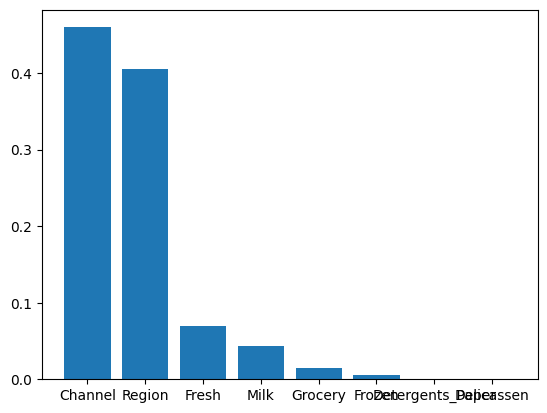

In [ ]:
from matplotlib import pyplot as plt
plt.bar(x=customers.columns, height=pca.explained_variance_ratio_)

In [ ]:
pca = PCA(n_components=2)
transfpcacustomers = pca.fit(customers)
customers_pca = pca.transform(customers)

In [ ]:
customers_pca

array([[ 6.50022120e+02,  1.58551911e+03],
       [-4.42680498e+03,  4.04245152e+03],
       [-4.84199871e+03,  2.57876219e+03],
       [ 9.90346444e+02, -6.27980600e+03],
       [ 1.06579987e+04, -2.15972579e+03],
       [-2.76596159e+03, -9.59870712e+02],
       [-7.15550892e+02, -2.01300225e+03],
       [-4.47458367e+03,  1.42949698e+03],
       [-6.71209539e+03, -2.20590917e+03],
       [-4.82363437e+03,  1.34805592e+04],
       [-7.97482899e+03,  5.71121893e+03],
       [ 3.63937822e+01, -6.03789639e+03],
       [ 1.99402020e+04,  4.59128651e+03],
       [ 9.39669557e+03,  5.91315706e+03],
       [ 1.26603704e+04,  4.54194546e+03],
       [-2.99772589e+03, -6.09387931e+03],
       [-1.05895236e+04,  6.58421595e+03],
       [-6.36709517e+03, -3.68071268e+03],
       [ 6.62382533e+03,  1.25471955e+03],
       [-4.86153157e+03, -2.25592277e+02],
       [ 4.79424416e+03, -3.98879934e+03],
       [-7.24486683e+03, -7.34772327e+03],
       [ 1.92992657e+04, -6.93681067e+03],
       [ 1.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(customers_pca)

KMeans(n_clusters=2)

In [ ]:
pd.DataFrame(customers_pca)

,0,1
0,650.022120,1585.519107
1,-4426.804984,4042.451521
2,-4841.998710,2578.762188
3,990.346444,-6279.806002
4,10657.998731,-2159.725789
...,...,...
435,20140.848491,6306.877234
436,25912.249956,-11757.647089
437,4555.114978,26201.758616
438,-2734.370912,-7070.775343


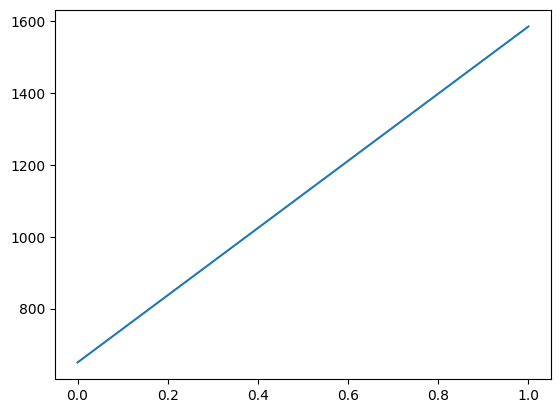

In [ ]:
plt.plot(customers_pca[0])

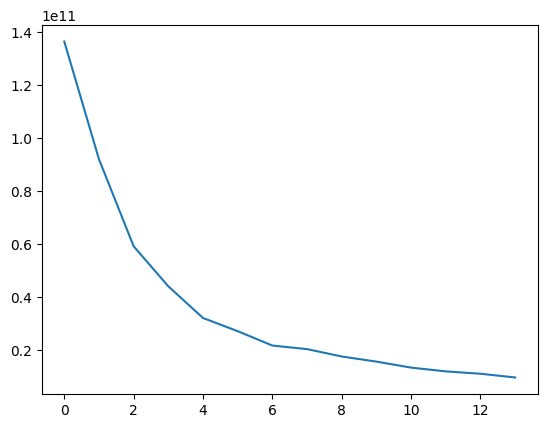

In [ ]:
inercias = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(customers_pca)
  inercias.append(kmeans.inertia_)
plt.plot(inercias)


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers_pca)
kmeans.labels_

array([0, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 3, 2, 2, 0, 2, 3, 1, 2, 0, 2, 2, 0, 0, 2, 2, 3, 1, 2, 2, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 0, 1, 0, 2, 0, 3, 0, 2, 0, 0, 3, 0, 0, 0, 3,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 3, 1,
       0, 2, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 3,
       0, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 3, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 3, 0, 2, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 3, 3, 2, 0, 0, 3, 0, 0, 0, 3, 2, 3, 0, 0, 0, 0, 3, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0,
       0, 3, 3, 2, 3, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1,
       0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2,

In [ ]:
datosEscalados = pd.DataFrame(customers_pca)
datosEscalados["cluster"] = kmeans.labels_
datosEscalados

,0,1,cluster
0,650.022120,1585.519107,0
1,-4426.804984,4042.451521,0
2,-4841.998710,2578.762188,0
3,990.346444,-6279.806002,2
4,10657.998731,-2159.725789,2
...,...,...,...
435,20140.848491,6306.877234,2
436,25912.249956,-11757.647089,1
437,4555.114978,26201.758616,3
438,-2734.370912,-7070.775343,0


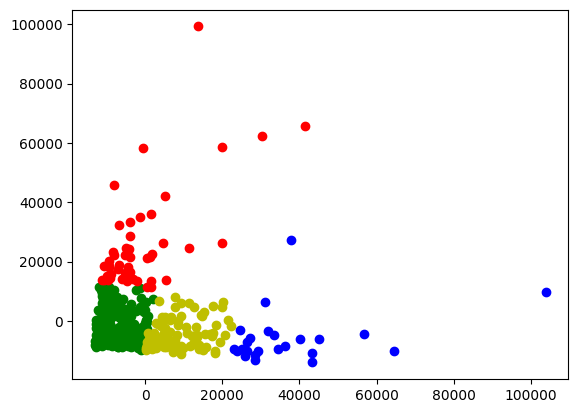

In [ ]:
plt.plot(datosEscalados[datosEscalados["cluster"] == 0][0],datosEscalados[datosEscalados["cluster"] == 0][1], "og")
plt.plot(datosEscalados[datosEscalados["cluster"] == 1][0],datosEscalados[datosEscalados["cluster"]==  1][1], "ob")
plt.plot(datosEscalados[datosEscalados["cluster"] == 2][0],datosEscalados[datosEscalados["cluster"] == 2][1], "oy")
plt.plot(datosEscalados[datosEscalados["cluster"] == 3][0],datosEscalados[datosEscalados["cluster"] == 3][1], "or")

##Datased Resultados Ventas

In [ ]:
import pandas as pd

In [ ]:
ventas = pd.read_excel("/content/drive/MyDrive/ESESA Lessons/Copia de resultados ventas.xlsx" , decimal=",")

In [ ]:
ventas

,IdCliente,Provincia,Grupo,Ventas 2018,Unidades 2018,Tickets 2018,Antigüedad,Ventas 2017,Unidades 2017,Tickets 2017,Ventas 2016,Unidades 2016,Tickets 2016,Ventas 2015,Unidades 2015,Tickets 2015,Ventas 2014,Unidades 2014,Tickets 2014
0,Cliente 1,29,Tienda/Supermercado de Alimentacion,1525.7880,2213.28,46,2009-01-05 09:45:21.000,3292.9751,2307.37,38.0,3545.6107,4569.70,49.0,6306.3445,8004.09,91.0,6439.1802,8519.13,83.0
1,Cliente 2,29,NaN,115.8179,82.97,1,2009-01-03 10:48:33.000,286.9034,145.04,3.0,446.0571,321.39,12.0,135.4624,91.62,4.0,190.4443,175.68,7.0
2,Cliente 3,29,Tienda/Supermercado de Alimentacion,25670.9588,35516.11,236,2009-01-03 09:07:38.000,27947.2056,36381.85,256.0,33964.7790,41264.90,257.0,36267.5888,42266.22,338.0,36096.9745,41184.69,348.0
3,Cliente 4,29,Tienda/Supermercado de Alimentacion,39519.3851,42299.20,358,2009-01-05 05:31:46.000,25968.0955,38376.72,231.0,14953.0722,24823.03,170.0,15524.3915,25823.11,248.0,13159.2442,21074.77,175.0
4,Cliente 5,29,Tienda/Supermercado de Alimentacion,2555.5218,2587.39,20,2009-01-12 11:39:56.000,3455.6742,2657.39,24.0,3335.1821,2684.27,31.0,1278.0458,950.49,10.0,1095.3949,563.89,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38782,Cliente 38783,4,Tienda/Supermercado de Alimentacion,971.5203,1479.77,12,2018-11-21 18:04:14.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38783,Cliente 38784,4,"Horeca (Bares, Restaurante, Cafet.)",52.2100,22.00,1,2018-12-13 17:23:42.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38784,Cliente 38785,4,NaN,53.5920,50.00,1,2018-12-20 13:23:19.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38785,Cliente 38786,18,Tienda/Supermercado de Alimentacion,173.0500,170.00,1,2018-12-28 19:14:02.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ventasanalisis = ventas

In [ ]:
ventasanalisis = ventasanalisis[["IdCliente" ,"Grupo" ,"Ventas 2018","Ventas 2017"]]
ventasanalisis


,IdCliente,Grupo,Ventas 2018,Ventas 2017
0,Cliente 1,Tienda/Supermercado de Alimentacion,1525.7880,3292.9751
1,Cliente 2,NaN,115.8179,286.9034
2,Cliente 3,Tienda/Supermercado de Alimentacion,25670.9588,27947.2056
3,Cliente 4,Tienda/Supermercado de Alimentacion,39519.3851,25968.0955
4,Cliente 5,Tienda/Supermercado de Alimentacion,2555.5218,3455.6742
...,...,...,...,...
38782,Cliente 38783,Tienda/Supermercado de Alimentacion,971.5203,NaN
38783,Cliente 38784,"Horeca (Bares, Restaurante, Cafet.)",52.2100,NaN
38784,Cliente 38785,NaN,53.5920,NaN
38785,Cliente 38786,Tienda/Supermercado de Alimentacion,173.0500,NaN


In [ ]:
ventasanalisis["IdCliente"] = ventasanalisis["IdCliente"].str.replace("Cliente ", "")
ventasanalisis ["IdCliente"] = ventasanalisis ["IdCliente"].astype(int)
ventasanalisis

/tmp/ipython-input-422718242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventasanalisis["IdCliente"] = ventasanalisis["IdCliente"].str.replace("Cliente ", "")
/tmp/ipython-input-422718242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventasanalisis ["IdCliente"] = ventasanalisis ["IdCliente"].astype(int)


,IdCliente,Grupo,Ventas 2018,Ventas 2017
0,1,Tienda/Supermercado de Alimentacion,1525.7880,3292.9751
1,2,NaN,115.8179,286.9034
2,3,Tienda/Supermercado de Alimentacion,25670.9588,27947.2056
3,4,Tienda/Supermercado de Alimentacion,39519.3851,25968.0955
4,5,Tienda/Supermercado de Alimentacion,2555.5218,3455.6742
...,...,...,...,...
38782,38783,Tienda/Supermercado de Alimentacion,971.5203,NaN
38783,38784,"Horeca (Bares, Restaurante, Cafet.)",52.2100,NaN
38784,38785,NaN,53.5920,NaN
38785,38786,Tienda/Supermercado de Alimentacion,173.0500,NaN


In [ ]:
ventasanalisis["Grupo"].unique()

array(['Tienda/Supermercado de Alimentacion', nan,
       'Horeca (Bares, Restaurante, Cafet.)', 'Otros', 'Particulares',
       'Distribuidor', 'Empleados ', 'Drogueria'], dtype=object)

In [ ]:
ventasanalisis["Grupo"] = ventasanalisis["Grupo"].dropna().replace({'Tienda/Supermercado de Alimentacion':0,
                                       'Horeca (Bares, Restaurante, Cafet.)':1,
                                       'Otros':2,
                                       'Particulares':3,
                                       'Distribuidor':4,
                                       'Empleados ':5,
                                       'Drogueria':6}).astype(int)

/tmp/ipython-input-1318901175.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ventasanalisis["Grupo"] = ventasanalisis["Grupo"].dropna().replace({'Tienda/Supermercado de Alimentacion':0,
/tmp/ipython-input-1318901175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventasanalisis["Grupo"] = ventasanalisis["Grupo"].dropna().replace({'Tienda/Supermercado de Alimentacion':0,


In [ ]:
ventasanalisis.dropna(inplace=True)
ventasanalisis

/tmp/ipython-input-399720526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventasanalisis.dropna(inplace=True)


,IdCliente,Grupo,Ventas 2018,Ventas 2017
0,1,0.0,1525.7880,3292.9751
2,3,0.0,25670.9588,27947.2056
3,4,0.0,39519.3851,25968.0955
4,5,0.0,2555.5218,3455.6742
5,6,0.0,8962.2348,11013.2875
...,...,...,...,...
38747,38748,0.0,1816.3840,4114.9790
38748,38749,0.0,6963.9730,8673.8530
38749,38750,1.0,1036.5040,618.4280
38750,38751,0.0,1949.5170,991.8283


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(ventasanalisis)

KMeans(n_clusters=4)

In [ ]:
from matplotlib import pyplot as plt

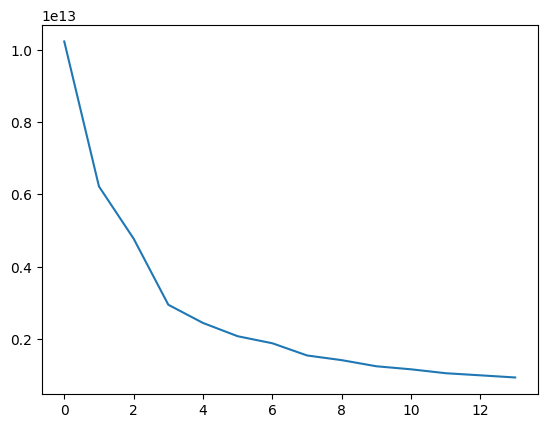

In [ ]:
inercias = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(ventasanalisis)
  inercias.append(kmeans.inertia_)
plt.plot(inercias)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
transfventas = pca.fit(ventasanalisis)

In [ ]:
ventaspca = pca.transform(ventasanalisis)
ventaspca

array([[-4.65882064e+03, -1.89969602e+04,  7.28508781e+02,
        -1.42377425e+00],
       [ 2.97044889e+04, -1.59349783e+04,  1.50798312e+03,
        -9.64988352e-01],
       [ 3.81754986e+04, -1.49133138e+04, -9.57777286e+03,
        -8.81851767e-01],
       ...,
       [-1.03279428e+04,  1.94257172e+04,  6.78177899e+01,
        -4.04841360e-01],
       [-9.41825035e+03,  1.95169608e+04, -3.02527744e+02,
        -1.39373237e+00],
       [-1.03415094e+04,  1.94219491e+04,  2.60968228e+02,
        -1.40450358e+00]])

In [ ]:
pca.explained_variance_ratio_#para investigar

array([0.69248646, 0.27884826])

In [ ]:
pca = PCA(n_components=2)
transfventas = pca.fit(ventasanalisis)
ventaspca = pca.transform(ventasanalisis)
ventaspca

array([[ -4658.82064371, -18996.96022082],
       [ 29704.48893219, -15934.97833793],
       [ 38175.49859775, -14913.31377132],
       ...,
       [-10327.94279526,  19425.71724223],
       [ -9418.25035493,  19516.96083856],
       [-10341.50937789,  19421.94907164]])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(ventaspca)

KMeans(n_clusters=2)

In [ ]:
pd.DataFrame(ventaspca)

,0,1
0,-4658.820644,-18996.960221
1,29704.488932,-15934.978338
2,38175.498598,-14913.313771
3,-3813.262641,-18902.966079
4,6012.906214,-18043.748542
...,...,...
24185,-7335.319667,19645.581270
24186,-495.439568,20267.181003
24187,-10327.942795,19425.717242
24188,-9418.250355,19516.960839


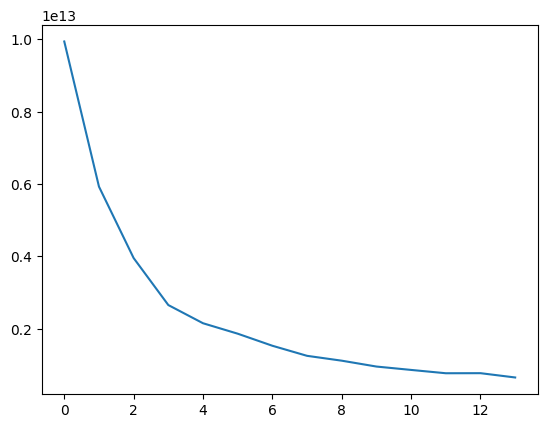

In [ ]:
inercias = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(ventaspca)
  inercias.append(kmeans.inertia_)
plt.plot(inercias)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(ventaspca)
kmeans.labels_

array([1, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
datosEscalados = pd.DataFrame(ventaspca)
datosEscalados["cluster"] = kmeans.labels_
datosEscalados

,0,1,cluster
0,-4658.820644,-18996.960221,1
1,29704.488932,-15934.978338,2
2,38175.498598,-14913.313771,2
3,-3813.262641,-18902.966079,1
4,6012.906214,-18043.748542,1
...,...,...,...
24185,-7335.319667,19645.581270,0
24186,-495.439568,20267.181003,0
24187,-10327.942795,19425.717242,0
24188,-9418.250355,19516.960839,0


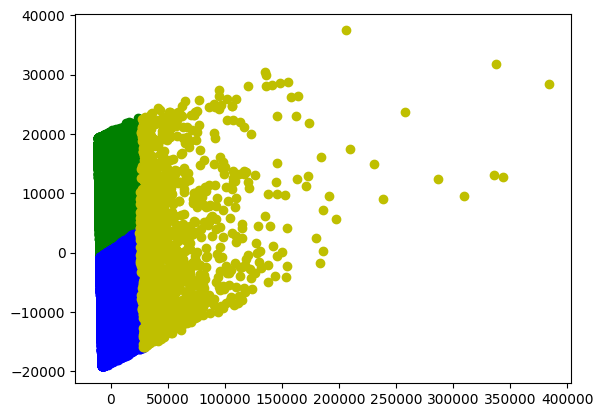

In [ ]:
plt.plot(datosEscalados[datosEscalados["cluster"] == 0][0],datosEscalados[datosEscalados["cluster"] == 0][1], "og")
plt.plot(datosEscalados[datosEscalados["cluster"] == 1][0],datosEscalados[datosEscalados["cluster"]==  1][1], "ob")
plt.plot(datosEscalados[datosEscalados["cluster"] == 2][0],datosEscalados[datosEscalados["cluster"]==  2][1], "oy")